## What is balanced and imbalanced dataset???

### Balanced Data: 
***Let’s Consider an example: if in our data set we have positive values which are 
approximately same as negative values. Then we can say our dataset in balanced.***


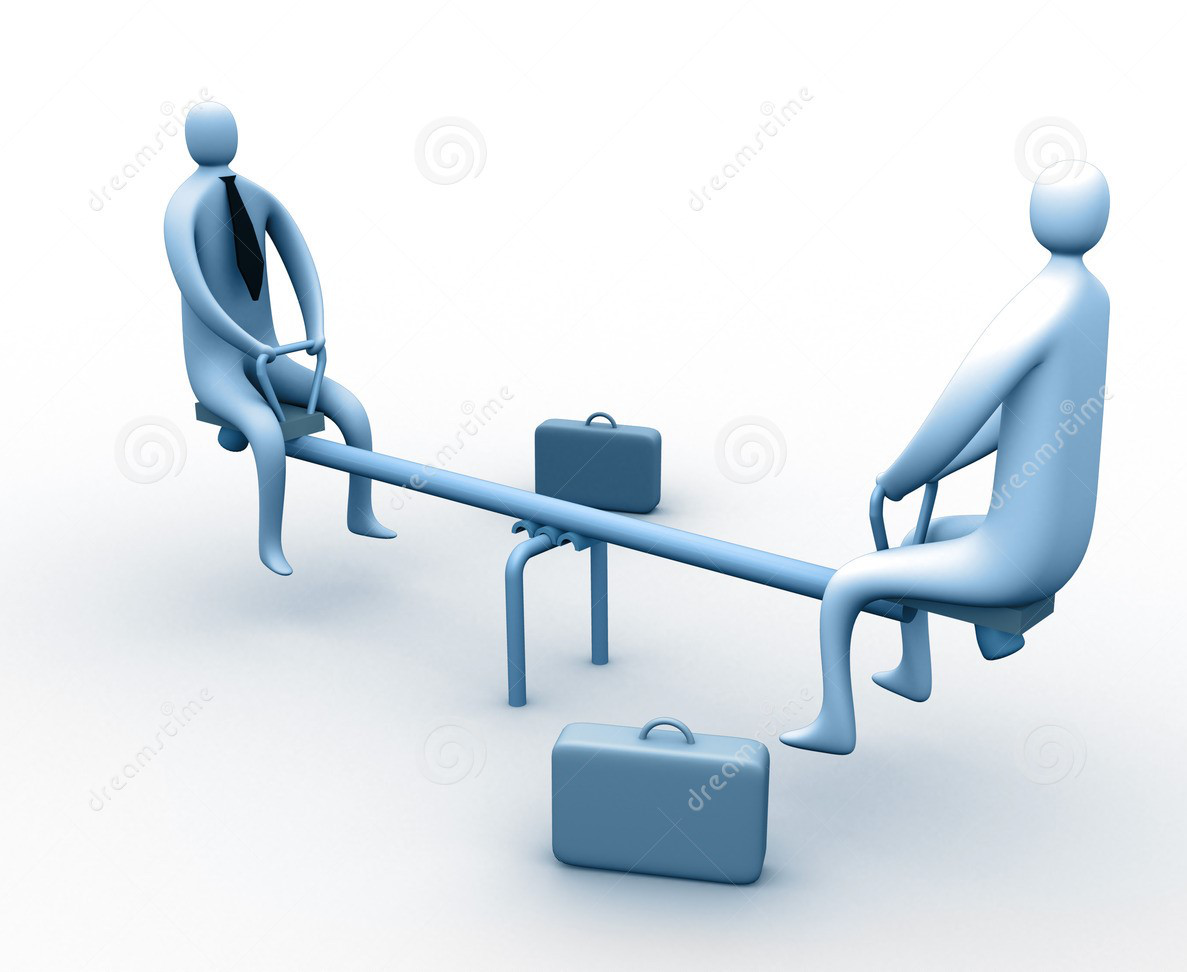

In [2]:
from PIL import Image
img = Image.open('balanced1.jpg')
img

### Imbalanced Data 
***If there's huge difference between the positive values and negative values. Then we can say our dataset in Imbalance Dataset.***

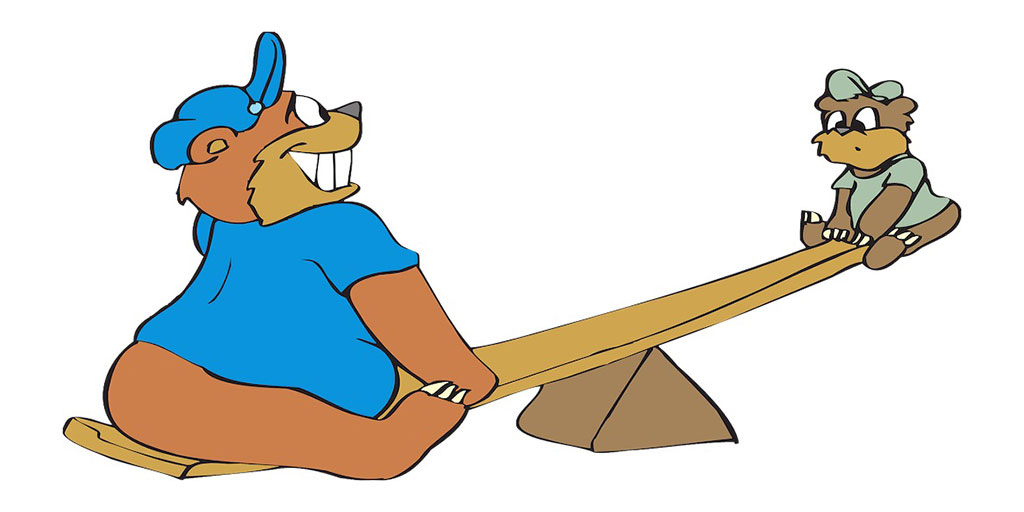

In [3]:
img = Image.open('imbalanced .jpg')
img

### Problem with imbalanced data

***Feeding imbalanced data to your classifier can make it biased in favor of the majority class, simply because it did not have enough data to learn about the minority.***

### Techniques to Handle Imbalance Data:

#### 1.Use the right evaluation metrics
#### 2.Re-Sampling - (Undersampling & Oversampling)
#### 3.Synthetic Minority Over-Sampling Technique (SMOTE)
#### 4.Tomel / SMOTE + Tomek
#### 5.Under-sampling: Cluster Centroids
#### 6.Use K-fold Cross-Validation in the right way
#### 7.Use of Ensemble Methods
#### 8.Use of Cost-Sensitive Algorithms
#### 9.Use of Multiple Classifiers
#### 10.The More Data, The Better

## Lets check these techniques with help of credit card fraud data

### 1.Use the right evaluation metrics

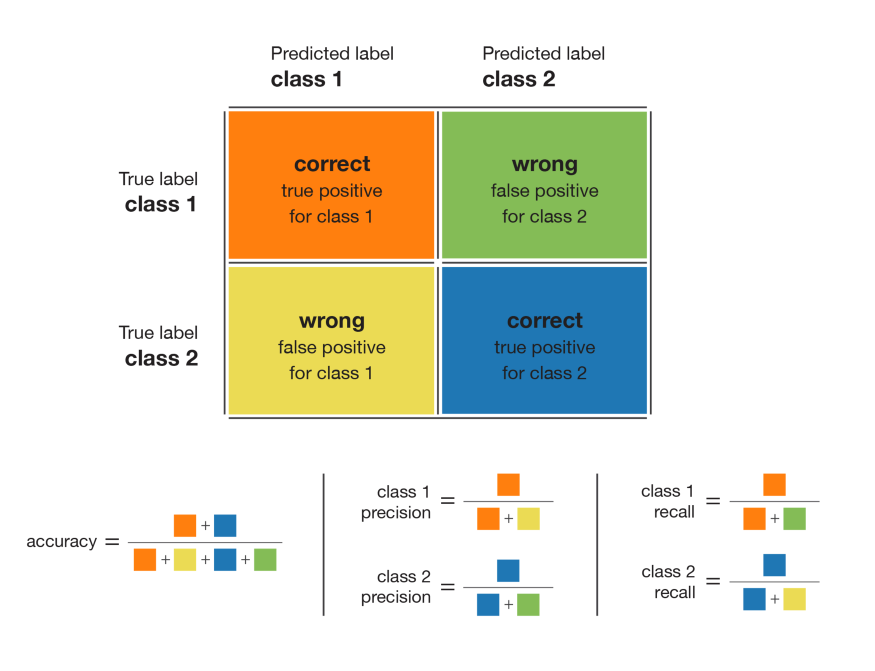

In [4]:
img = Image.open('0__mO22Txi4K3KvTTg.png')
img

***One of the major issues that new developer users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.***

### Metrics that can provide better insight include:

**Precision:** Propoetion of True Positive(TP) cases that are predicted as positive **(tp/tp+fp)**
                 
  The **precision** of a class define how trustable is the result when the model answer that a point belongs to                    that class.


**Recall:** Proportion of True Positive from cases that are actually positive **(tp/tp+fn)**
               
   The **recall** of a class expresses how well the model is able to detect that class.


The **F1 score** of a class is given by the harmonic mean of precision and recall

**(2×precision×recall / (precision + recall))**, it combines precision and recall of a class in one metric.


### For a given class, the different combinations of recall and precision have the following meanings:

***high recall + high precision*** : **the class is perfectly handled by the model**.

***low recall + high precision*** : **the model can’t detect the class well but is highly trustable when it does**.

***high recall + low precision*** : **the class is well detected but the model also include points of other classes in it**.

***low recall + low precision*** : **the class is poorly handled by the model**.

### 2. RE-SAMPLING TECHNIQUES

**A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples to the minority class (over-sampling).**

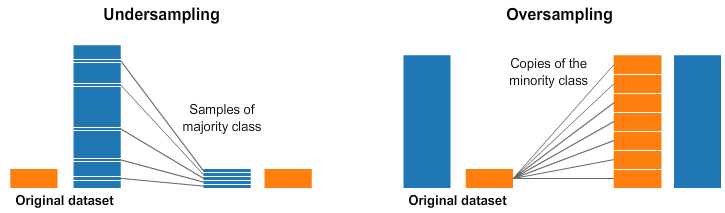

In [5]:
img = Image.open('1_H6XodlitlGDl9YdbwaZLMw.png')
img

### Let's Start the Implement of UNDER SAMPLING & OVER SAMPLING


### Loading dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [21]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]


print("BEFORE UNDER SAMPLING")
print("---------------------")
print(fraud.shape,normal.shape)

BEFORE UNDER SAMPLING
---------------------
(492, 31) (284315, 31)


### Features Scaling

##### Since already data has been scaled, but we should scale the columns which are yet to scale

In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Robustscaler is less prone to outliers
sc = StandardScaler()
rs = RobustScaler()
df['scale_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scale_time'] = rs.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis = 1, inplace=True)

In [24]:
#lets split the data to X and Y
x = df.iloc[:,:-3]
y = df.iloc[:,-3]

In [28]:
#splitting the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state= 40)

### Under Sampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
X_res, y_res= rus.fit_resample(x, y)

In [30]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [43]:
lr_rus = LogisticRegression()
lr_rus.fit(X_res, y_res)
lr_pred = lr_rus.predict(x_test)
accuracy_score(y_test, lr_pred)

0.9629402057512025

### Over sampling

***Always do the train/test split before creating synthetic/augmented samples.
You want to validate and test your model on original data observations.***

In [36]:
from imblearn.over_sampling import RandomOverSampler

ros =  RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [44]:
lr_ros = LogisticRegression()
lr_ros.fit(X_ros, y_ros)
lr_pred = lr_ros.predict(x_test)
accuracy_score(y_test, lr_pred)

0.9774235455215758

### 3. Synthetic Minority Over-Sampling Technique (SMOTE)

***Just like the name suggests, the technique generates synthetic data for the minority class.***

***SMOTE proceeds by joining the points of the minority class with line segments and then places artificial points on these lines.***

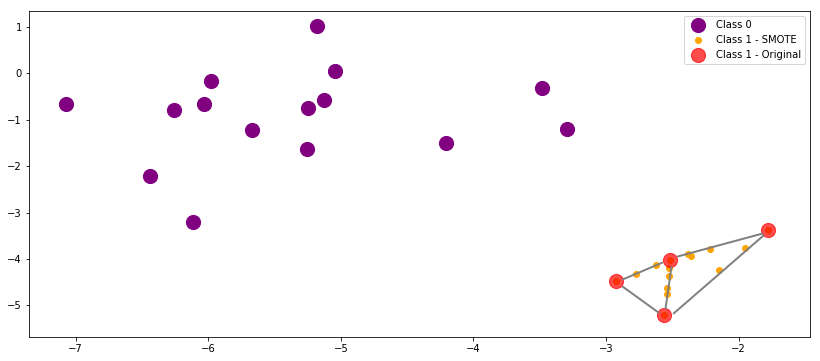

In [38]:
img = Image.open('1_nHwVl6AgcP_ym8RbXuKvSg.png')
img

### The SMOTE algorithm works in 4 simple steps:

#### 1.Choose a minority class input vector
#### 2.Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
#### 3.Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
#### 4.Repeat the steps until data is balanced


### Let's Start the Implement of SMOTE using Python”


In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_smote, y_smote = sm.fit_resample(x, y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_smote)))


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [46]:
lr_smt = LogisticRegression()
lr_smt.fit(X_smote, y_smote)
lr_pred = lr_smt.predict(x_test)
accuracy_score(y_test, lr_pred)

0.9750008777781679

### 4.Tomel / SMOTE + Tomek

***This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class.***


### The process of SMOTE-Tomek Links is as follows.

***(Start of SMOTE) Choose random data from the minority class.***

***Calculate the distance between the random data and its k nearest neighbors.***

***Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.***

***Repeat step number 2–3 until the desired proportion of minority class is met. (End of SMOTE)***

***(Start of Tomek Links) Choose random data from the majority class.***

***If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.***

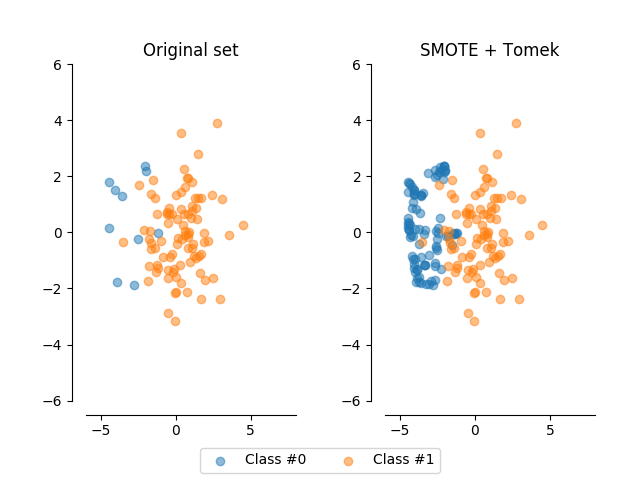

In [47]:
img = Image.open('sphx_glr_plot_smote_tomek_001.png')
img

### 5. Under-sampling: Cluster Centroids

***This method undersamples the majority class by replacing a cluster of majority samples This method finds the clusters of majority class with K-mean algorithms. Then it keeps the cluster centroids of the N clusters as the new majority samples.***

### Let's Start the Implement of Cluster Centroids using Python



In [48]:
from imblearn.under_sampling import ClusterCentroids
sampler = ClusterCentroids()
X_rs, y_rs = sampler.fit_resample(x, y)
print('Cluster centriods undersampling {}'.format(Counter(y_rs)))

Cluster centriods undersampling Counter({0: 492, 1: 492})


***It will take alot of time to excute***

### 6. Use K-fold Cross-Validation in the right way

***It is noteworthy that cross-validation should be applied properly while using over-sampling method to address imbalance problems.***

***Keep in mind that over-sampling takes observed rare samples and applies bootstrapping to generate new random data based on a distribution function. If cross-validation is applied after over-sampling, basically what we are doing is overfitting our model to a specific artificial bootstrapping result.***

***That is why cross-validation should always be done before over-sampling the data, just as how feature selection should be implemented. Only by resampling the data repeatedly, randomness can be introduced into the dataset to make sure that there won’t be an overfitting problem.***





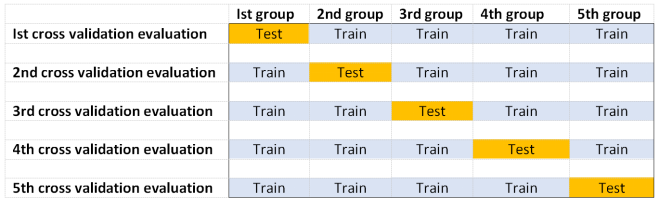

In [49]:
img = Image.open('1_fb-rdCbeErLMzDXBa4IGDw.png')
img

### 7. Use of Ensemble Methods

***Use of ensemble methods is one of the ways to handle the class imbalance problems of the dataset. The learning algorithms construct a set of classifiers and then classify new data points by making a choice of their predictions known as Ensemble methods.***

***It has been discovered that ensembles are often much more accurate than the individual classifiers which make them up. Some of the commonly used Ensemble techniques are Bagging or Bootstrap Aggregation, Boosting and Stacking.***

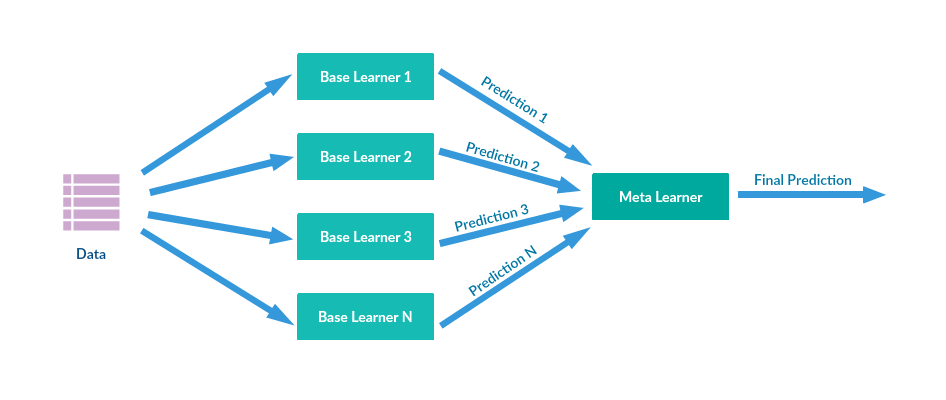

In [51]:
img = Image.open('stacking.png')
img

### Lets perform the methods

In [52]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [54]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
accuracy_score(y_test, rf_pred)

0.9996839998595555

In [55]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
accuracy_score(y_test, ada_pred)

0.9993504441557529

In [56]:
gb =  GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
accuracy_score(y_test, gb_pred)

0.999420666409185

In [57]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
xg_pred = xg_pred.predict(x_test)
accuracy_score(y_test, xg_pred)

C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NameError: name 'xg_pred' is not defined

### 8. Use of Cost-Sensitive Algorithms
Cost-Sensitive Learning is a type of learning that takes the misclassification or other types of costs into consideration. Cost-sensitive learning is a popular and common approach to solve the class imbalanced datasets. ***Popular machine learning libraries such as support vector machines (SVM), random forest, decision trees, logistic regression,*** among others, can be configured using the cost-sensitive training.


### 9.Use of Multiple Classifiers

Multiple Classification system is an approach where a classification system is built for imbalanced data based on the combination of several classifiers. It is a method for building multiple classifier systems in which each constituting classifier is trained on a subset of the majority class and on the whole minority class. The basis behind this method is the partition of the set of samples of the majority class in several subsets, each consisting of as many samples as the minority class.


### 10. The More Data, The Better
Machine learning models are data-hungry. In most cases, researchers spend most of their time in tasks like ***data cleaning,*** ***analysing,*** ***visualising,*** among others during an end-to-end machine learning process and contribute less time in data collection. While all of these steps are important, often the collection of data gets limited to certain numbers. To avoid such circumstances, one must add more data into the dataset. Collecting more data with relevant examples of the undersampled class of the dataset will help to overcome the issue.

## CONCLUSION

As with most things in data science and machine learning algorithms, ***there is no definitive right approach*** that works every time. ***Depending on the nature of your dataset, distribution of classes, predictors and model, some of the above-mentioned methods may work better.*** It is up to you to figure out the best combination.


In addition to these steps, don’t forget that you still have to do things such as ***data cleaning, feature selection and hyper-parameter tuning.***